In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [2]:
shootings_list_df = pd.read_csv("fatal-police-shootings-data.csv")
shootings_list_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [3]:
shootings_droppedna_df = shootings_list_df.dropna(how="any")
shootings_droppedna_df.count()

id                         3450
name                       3450
date                       3450
manner_of_death            3450
armed                      3450
age                        3450
gender                     3450
race                       3450
city                       3450
state                      3450
signs_of_mental_illness    3450
threat_level               3450
flee                       3450
body_camera                3450
dtype: int64

In [4]:
#Changed format for race and gender columns
shootings_droppedna_df["race"] = shootings_droppedna_df.race.map({'A':'Asian', 'W':'White, Non-Hispanic', 
'B':'Black, Non-Hispanic', 'N':'Native American', 'H':'Hispanic', 'O':'Other'})

shootings_droppedna_df["gender"]=shootings_droppedna_df.gender.map({'M': 'Male', 'F': 'Female'})
shootings_droppedna_df

#split the date to pull only year
shootings_droppedna_df["date"]= shootings_droppedna_df["date"].str.split("-", n = 1, expand = True)
shootings_droppedna_df

#rename date to year
renamed_shootings_table=shootings_droppedna_df.rename(columns={"date": "year", "armed": "Type of Weapon"})
renamed_shootings_table

#changed datatype for age to int in order to be able to remove decimals
renamed_shootings_table.loc[:, "age"] = renamed_shootings_table["age"].astype("int")
renamed_shootings_table.dtypes

#decimal removed from age 
renamed_shootings_table=renamed_shootings_table.round()
renamed_shootings_table.head()

C:\Users\19094\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\19094\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\19094\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,id,name,year,manner_of_death,Type of Weapon,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015,shot,gun,53,Male,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015,shot,gun,47,Male,"White, Non-Hispanic",Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015,shot and Tasered,unarmed,23,Male,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015,shot,toy weapon,32,Male,"White, Non-Hispanic",San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015,shot,nail gun,39,Male,Hispanic,Evans,CO,False,attack,Not fleeing,False


In [5]:
#total number of shootings
total_count= shootings_droppedna_df["name"].count()
total_count

3450

In [6]:
#number of shootings per year
year_groups = renamed_shootings_table["year"].value_counts()
year_groups.head()

#creating dataframe and resetting index
year_groups_df=pd.DataFrame(year_groups)
year_groups_df=year_groups_df.reset_index()

#renaming columns
year_groups_df=year_groups_df.rename(columns={"index": "Year", "year": "Count by Year"})
year_groups_df

,Year,Count by Year
0,2015,895
1,2016,814
2,2017,783
3,2018,780
4,2019,178


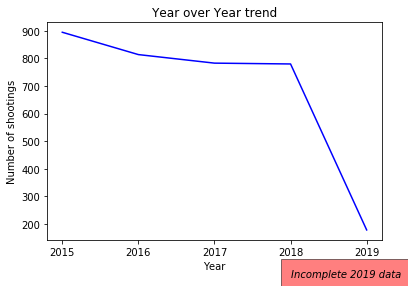

In [7]:
year_trend, = plt.plot(year_groups, color='blue', label="Year")
plt.xlabel("Year")
plt.ylabel("Number of shootings")
plt.title("Year over Year trend")
plt.text(3, 8, 'Incomplete 2019 data', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
year_trend

<BarContainer object of 5 artists>

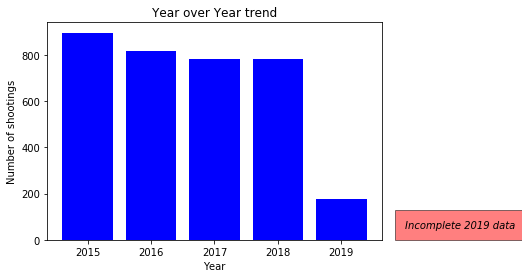

In [8]:
year_trend = plt.bar(year_groups_df["Year"], year_groups_df["Count by Year"], color='blue', label="Year", align="center")
plt.xlabel("Year")
plt.ylabel("Number of shootings")
plt.title("Year over Year trend")
plt.text(5, 50, 'Incomplete 2019 data', style='italic',
         bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
year_trend

In [9]:
#number of shootings by gender
gender_groups = shootings_droppedna_df["gender"].value_counts()
# gender_groups.head()

#percentage of shootings by gender
gender_percentage = (gender_groups/total_count).map("{:.2%}".format)
# gender_percentage

#Number of shootings by gender summary dataframe
gender_summary_df=pd.DataFrame({
    "Gender Total":gender_groups,
    "Gender Percentage":gender_percentage
})
gender_summary_df

,Gender Total,Gender Percentage
Male,3294,95.48%
Female,156,4.52%


In [10]:
#Number of shootings by race
race_groups = shootings_droppedna_df["race"].value_counts()
# race_groups.head(6)

#Percentage of shootings by race
race_percentage = (race_groups/total_count).map("{:.2%}".format)
# race_percentage

race_summary_df=pd.DataFrame({
    "Race Total":race_groups,
    "Race Percentage":race_percentage
})
race_summary_df

,Race Total,Race Percentage
"White, Non-Hispanic",1783,51.68%
"Black, Non-Hispanic",885,25.65%
Hispanic,626,18.14%
Asian,64,1.86%
Native American,58,1.68%
Other,34,0.99%


(-1.1097669881654402,
 1.1083024373052925,
 -1.1092736520078934,
 1.1039723517096596)

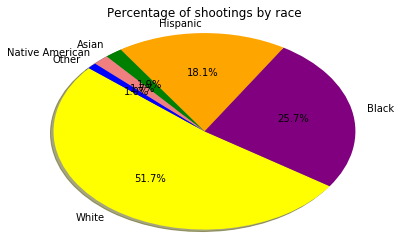

In [11]:
labels = ["White", "Black", "Hispanic", "Asian", "Native American", "Other"]
colors = ["yellow", "purple", "orange", "green", "lightcoral", "blue"]
explode = (0, 0, 0, 0, 0, 0)
plt.pie(race_groups, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Percentage of shootings by race")
plt.axis("tight")

In [12]:
#Number of shootings by state
shootings_by_state = shootings_droppedna_df.groupby(["state"]).count()["name"]
shootings_by_state

#creating dataframe and resetting index
for_top_states_df = pd.DataFrame(shootings_by_state)               
for_top_states_df=for_top_states_df.reset_index()
for_top_states_df

#renaming column
for_top_states_df=for_top_states_df.rename(columns={"state": "State", "name": "Count by State"})
for_top_states_df

# sorted state count
sorted_top_states= for_top_states_df.sort_values("Count by State", ascending=False)
sorted_top_states.head(51)

,State,Count by State
4,CA,505
43,TX,286
9,FL,219
3,AZ,169
35,OH,111
10,GA,111
5,CO,109
36,OK,107
27,NC,103
42,TN,90


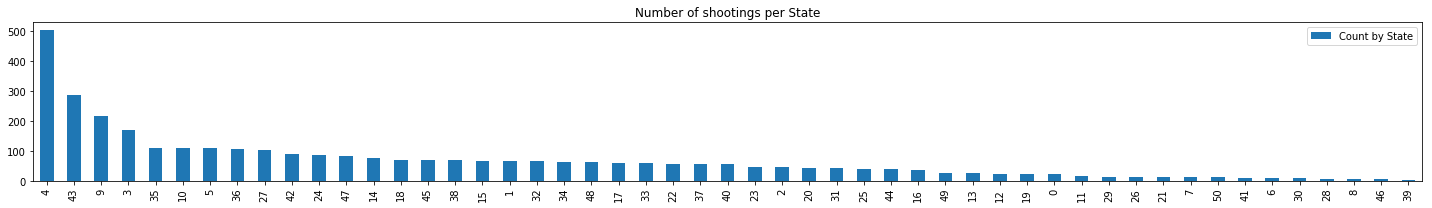

In [13]:
sorted_top_states.plot(kind="bar", figsize=(20, 3))
plt.title("Number of shootings per State")
plt.tight_layout()

Text(0, 0.5, 'Number of shootings')

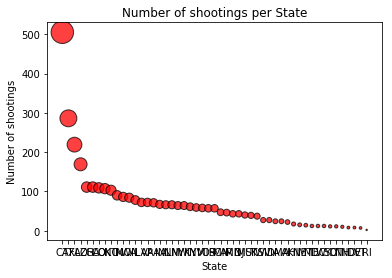

In [14]:
# sorted_top_states.plot(kind="scatter", figsize=(20, 3))
# plt.title("Number of shootings per State")
# plt.tight_layout()       

plt.scatter(sorted_top_states ["State"], sorted_top_states ["Count by State"], marker="o", facecolors="red", 
            edgecolors="black", s=sorted_top_states ["Count by State"], alpha=0.75)
plt.title("Number of shootings per State")
plt.xlabel("State")
plt.ylabel("Number of shootings")

In [15]:
#Pulling columns from main dataframe
state_race_table = shootings_droppedna_df [["name","date", "state", "race"]]
state_race_table.head(10)

,name,date,state,race
0,Tim Elliot,2015,WA,Asian
1,Lewis Lee Lembke,2015,OR,"White, Non-Hispanic"
2,John Paul Quintero,2015,KS,Hispanic
3,Matthew Hoffman,2015,CA,"White, Non-Hispanic"
4,Michael Rodriguez,2015,CO,Hispanic
5,Kenneth Joe Brown,2015,OK,"White, Non-Hispanic"
6,Kenneth Arnold Buck,2015,AZ,Hispanic
7,Brock Nichols,2015,KS,"White, Non-Hispanic"
8,Autumn Steele,2015,IA,"White, Non-Hispanic"
9,Leslie Sapp III,2015,PA,"Black, Non-Hispanic"


In [16]:
#count by year, state and race
count_state_race = state_race_table.groupby(["date", "state", "race"]).count()["name"]
count_state_race.head(25)

date  state  race               
2015  AK     Native American         2
             White, Non-Hispanic     2
      AL     Black, Non-Hispanic     6
             White, Non-Hispanic    11
      AR     Black, Non-Hispanic     1
             White, Non-Hispanic     3
      AZ     Hispanic               12
             Native American         1
             White, Non-Hispanic    26
      CA     Asian                   7
             Black, Non-Hispanic    31
             Hispanic               70
             Other                   7
             White, Non-Hispanic    50
      CO     Asian                   1
             Black, Non-Hispanic     5
             Hispanic                7
             Native American         1
             White, Non-Hispanic    11
      CT     White, Non-Hispanic     2
      DC     Black, Non-Hispanic     4
      DE     Black, Non-Hispanic     1
             White, Non-Hispanic     1
      FL     Black, Non-Hispanic    23
             Hispanic          

In [17]:
#percentage by state and race
# percentage_state_race=(count_state_race/total_count).map("{:.2%}".format)
# percentage_state_race

In [18]:
#Age group classification
#getting max and min in order to determine age bin limits
print(shootings_droppedna_df["age"].max())
print(shootings_droppedna_df["age"].min())


91.0
6.0


In [19]:
bins = [4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94]

group_labels= ["5 to 9", "10 to 14", "15 to 19", "20 to 24", "25 to 29", "30 to 34", "35 to 39", "40 to 44", "45 to 49",
              "50 to 54", "55 to 59", "60 to 64", "65 to 69", "70 to 74", "75 to 79", "80 to 84", "85 to 89", "90 to 94"]

#adding Age Group column and pulling in age by bins and labels
shootings_droppedna_df["Age Group"] = pd.cut(shootings_droppedna_df["age"], bins, labels=group_labels)
# shootings_droppedna_df.head()

#grouping by Age Group in order to be able to perform count function
group_by_age = shootings_droppedna_df.groupby("Age Group")
group_by_age.head()

C:\Users\19094\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Age Group
0,3,Tim Elliot,2015,shot,gun,53.0,Male,Asian,Shelton,WA,True,attack,Not fleeing,False,50 to 54
1,4,Lewis Lee Lembke,2015,shot,gun,47.0,Male,"White, Non-Hispanic",Aloha,OR,False,attack,Not fleeing,False,45 to 49
2,5,John Paul Quintero,2015,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,KS,False,other,Not fleeing,False,20 to 24
3,8,Matthew Hoffman,2015,shot,toy weapon,32.0,Male,"White, Non-Hispanic",San Francisco,CA,True,attack,Not fleeing,False,30 to 34
4,9,Michael Rodriguez,2015,shot,nail gun,39.0,Male,Hispanic,Evans,CO,False,attack,Not fleeing,False,35 to 39
5,11,Kenneth Joe Brown,2015,shot,gun,18.0,Male,"White, Non-Hispanic",Guthrie,OK,False,attack,Not fleeing,False,15 to 19
6,13,Kenneth Arnold Buck,2015,shot,gun,22.0,Male,Hispanic,Chandler,AZ,False,attack,Car,False,20 to 24
7,15,Brock Nichols,2015,shot,gun,35.0,Male,"White, Non-Hispanic",Assaria,KS,False,attack,Not fleeing,False,35 to 39
8,16,Autumn Steele,2015,shot,unarmed,34.0,Female,"White, Non-Hispanic",Burlington,IA,False,other,Not fleeing,True,30 to 34
9,17,Leslie Sapp III,2015,shot,toy weapon,47.0,Male,"Black, Non-Hispanic",Knoxville,PA,False,attack,Not fleeing,False,45 to 49


In [20]:
agegroup_count = group_by_age["Age Group"].count()
agegroup_count

Age Group
5 to 9        2
10 to 14      5
15 to 19    192
20 to 24    412
25 to 29    575
30 to 34    562
35 to 39    478
40 to 44    330
45 to 49    304
50 to 54    234
55 to 59    172
60 to 64     88
65 to 69     51
70 to 74     25
75 to 79     11
80 to 84      8
85 to 89      0
90 to 94      1
Name: Age Group, dtype: int64

In [21]:
#Pulling columns from main dataframe
state_age_table = shootings_droppedna_df [["name","date", "Age Group"]]
state_age_table.head(10)

,name,date,Age Group
0,Tim Elliot,2015,50 to 54
1,Lewis Lee Lembke,2015,45 to 49
2,John Paul Quintero,2015,20 to 24
3,Matthew Hoffman,2015,30 to 34
4,Michael Rodriguez,2015,35 to 39
5,Kenneth Joe Brown,2015,15 to 19
6,Kenneth Arnold Buck,2015,20 to 24
7,Brock Nichols,2015,35 to 39
8,Autumn Steele,2015,30 to 34
9,Leslie Sapp III,2015,45 to 49


In [22]:
count_state_age = state_age_table.groupby(["date", "Age Group"]).count()["name"]
count_state_age.head(25)

date  Age Group
2015  5 to 9         1.0
      10 to 14       NaN
      15 to 19      47.0
      20 to 24     119.0
      25 to 29     152.0
      30 to 34     134.0
      35 to 39     119.0
      40 to 44      77.0
      45 to 49      94.0
      50 to 54      61.0
      55 to 59      46.0
      60 to 64      25.0
      65 to 69      11.0
      70 to 74       4.0
      75 to 79       4.0
      80 to 84       1.0
      85 to 89       NaN
      90 to 94       NaN
2016  5 to 9         NaN
      10 to 14       3.0
      15 to 19      46.0
      20 to 24      98.0
      25 to 29     129.0
      30 to 34     137.0
      35 to 39     126.0
Name: name, dtype: float64

In [23]:
race_armed_table = shootings_droppedna_df [["name", "armed"]]
race_armed_table.head(10)

,name,armed
0,Tim Elliot,gun
1,Lewis Lee Lembke,gun
2,John Paul Quintero,unarmed
3,Matthew Hoffman,toy weapon
4,Michael Rodriguez,nail gun
5,Kenneth Joe Brown,gun
6,Kenneth Arnold Buck,gun
7,Brock Nichols,gun
8,Autumn Steele,unarmed
9,Leslie Sapp III,toy weapon


In [24]:
armed_table = renamed_shootings_table [["name", "Type of Weapon"]]
# armed_table.head(10)

armed_table_two = armed_table.groupby(["Type of Weapon"]).count()["name"]
# name_armed_table_two.head(100)

#creating dataframe and resetting index
for_top_armed_df = pd.DataFrame(armed_table_two)               
for_top_armed_df=for_top_armed_df.reset_index()
for_top_armed_df

#renaming columns
for_top_armed_df=for_top_armed_df.rename(columns={"name": "Count"})
for_top_armed_df

#sorted armed count
sorted_top_armed= for_top_armed_df.sort_values("Count", ascending=False)
sorted_top_armed.head(100)



,Type of Weapon,Count
29,gun,2041
40,knife,538
74,unarmed,260
73,toy weapon,143
75,undetermined,123
77,vehicle,48
76,unknown weapon,41
42,machete,32
1,Taser,16
72,sword,15


In [25]:
mannerofdeath_table = shootings_droppedna_df [["race", "manner_of_death"]]
mannerofdeath_table.head(10)

manner_table = mannerofdeath_table.groupby(["manner_of_death"]).count()["race"]
# name_armed_table_two.head(100)

#For sorting shootings_by_state.head(25)
name_manner_df = pd.DataFrame({"Manner of Death Count": manner_table})               
name_manner_df.head()

# #sorted state count
# sorted_top_armed= for_top_armed_df.sort_values("Armed Count", ascending=False)
# sorted_top_armed.head(25)

# manner_of_death

,Manner of Death Count
manner_of_death,
shot,3260
shot and Tasered,190


In [26]:
#attempt to pull all data for body camera TRUE
bodycam_data_true= shootings_droppedna_df.loc[shootings_droppedna_df["body_camera"]== True, :]
# print(bodycam_data_true)
bodycam_data_true.count()

id                         399
name                       399
date                       399
manner_of_death            399
armed                      399
age                        399
gender                     399
race                       399
city                       399
state                      399
signs_of_mental_illness    399
threat_level               399
flee                       399
body_camera                399
Age Group                  399
dtype: int64

In [27]:
bodycam_data_false= shootings_droppedna_df.loc[shootings_droppedna_df["body_camera"]== False, :]
# print(bodycam_data_false)
bodycam_data_false.count()

id                         3051
name                       3051
date                       3051
manner_of_death            3051
armed                      3051
age                        3051
gender                     3051
race                       3051
city                       3051
state                      3051
signs_of_mental_illness    3051
threat_level               3051
flee                       3051
body_camera                3051
Age Group                  3051
dtype: int64

In [28]:
mentalillness_data_true= shootings_droppedna_df.loc[shootings_droppedna_df["signs_of_mental_illness"]== True, :]
# print(mentalillness_data_true)
mentalillness_data_true.count()

id                         868
name                       868
date                       868
manner_of_death            868
armed                      868
age                        868
gender                     868
race                       868
city                       868
state                      868
signs_of_mental_illness    868
threat_level               868
flee                       868
body_camera                868
Age Group                  868
dtype: int64

In [29]:
mentalillness_data_false= shootings_droppedna_df.loc[shootings_droppedna_df["signs_of_mental_illness"]== False, :]
# print(mentalillness_data_false)
mentalillness_data_false.count()

id                         2582
name                       2582
date                       2582
manner_of_death            2582
armed                      2582
age                        2582
gender                     2582
race                       2582
city                       2582
state                      2582
signs_of_mental_illness    2582
threat_level               2582
flee                       2582
body_camera                2582
Age Group                  2582
dtype: int64